In [3]:
import pandas as pd
import pickle

In [31]:
%%time
labeled= clf(all_tweets)
pickle.dump(labeled, open('June_labeled_all_alc_svc.p', 'wb'))

Wall time: 7h 33min 31s


In [6]:
from classification.prediction import PredictionTransformer

In [7]:
clf = PredictionTransformer(clf_alc, clf_fpa, clf_fpl)

In [4]:
df1 = pickle.load(open('pickles/June_drinking_labeled.p', 'rb'))

In [5]:
df2 = pickle.load(open('pickles/June_labeled_all.p', 'rb'))

In [6]:
df_all = pd.concat([df1, df2])

In [7]:
df_all.head(5)

,_id,created_at,id,predict_alc,predict_fpa,predict_fpa|alc,predict_future,predict_future|fpa,predict_past,predict_past|fpa,predict_present,predict_present|fpa,text
created_at,,,,,,,,,,,,,
2015-06-01 00:00:03,556ba05ed6dfbb2f470d13f6,Mon Jun 01 00:00:03 +0000 2015,605161852822274054,0.000473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Here's to the start of a new beginning🎓 @ brok...
2015-06-01 00:00:06,556ba061d6dfbb2f470d1419,Mon Jun 01 00:00:06 +0000 2015,605161865455353856,0.935243,0.319277,0.341385,0.000088,0.000277,0.000048,0.000149,0.319141,0.999574,Video: MANHATTAN drink Marilyn Monroe! @Marily...
2015-06-01 00:00:07,556ba062d6dfbb2f470d1424,Mon Jun 01 00:00:07 +0000 2015,605161869486235648,0.814484,0.462539,0.567893,0.327625,0.708319,0.036748,0.079447,0.098167,0.212234,"It's time for book club, b*tches! #thedrunklon..."
2015-06-01 00:00:09,556ba063d6dfbb2f470d142d,Mon Jun 01 00:00:09 +0000 2015,605161875022618624,0.016972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,They all be banging and shit 😂
2015-06-01 00:00:09,556ba064d6dfbb2f470d142e,Mon Jun 01 00:00:09 +0000 2015,605161875257442304,0.267452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,We're thinking there needs to be a Triple Crow...


In [16]:
np.mean(df_all.predict_fpa> 0.75)

0.031946797827391411

In [17]:
df_all.shape

(1608205, 13)

# Split by week

In [18]:
# beginning of first day to end of last day
week1 = df_all['2015-06-01':'2015-06-07']
week2 = df_all['2015-06-08':'2015-06-14']
week3 = df_all['2015-06-015':'2015-06-21']
week4 = df_all['2015-06-022':'2015-06-28']
week5 = df_all['2015-06-29':]
weeks = [week1, week2, week3, week4]

In [12]:
import matplotlib.pylab as plt
import matplotlib as m

%matplotlib inline

import pandas as pd
import numpy as np

In [13]:
plt.rcParams["figure.figsize"] = (14, 5)
plt.rcParams["figure.dpi"] = 600
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.size"] = 14
plt.rcParams["legend.fontsize"] = "x-large"
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'
plt.rcParams.update({'figure.autolayout': True})
# plt.rcParams

In [10]:
def centered_95int(data):
    return 1.96 * (data.std() / np.sqrt(len(data)))

In [16]:
def setup(df):
    p = 0.75
    of_interest = df.predict_fpa > p

    df["first_person_alcohol"] = 0
    df["first_person_alcohol"][of_interest] = 1
    fp_cols = [ 'predict_present', 'predict_future', 'predict_past']
    new_fp_cols = ["casual", "looking", "reflecting"]
    for new_name, old_name in zip(new_fp_cols, fp_cols):
        df[new_name] = df[old_name] >0.6

In [86]:
def plot_fps_week(df, folder):
    temp = df.groupby([df.index.dayofweek, df.index.hour]).agg(
        {
            _:{"mean":"mean", "err":centered_95int} for _ in new_fp_cols
        }
    )
    stds = pd.rolling_mean(temp[[1,3,5]], 3)
    means = pd.rolling_mean(temp[[0,2,4]], 3)

    means.columns = [col[0] for col in means.columns.values]
    stds.columns = [col[0] for col in stds.columns.values]


    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.plot(range(len(means)), means.casual, "r.-", label="casual")
    ax.fill_between(
        x=range(len(means)),
        y1=means.casual - stds.casual,
        y2=means.casual + stds.casual,
        color='r', alpha=.1
    )


    ax.plot(range(len(means)), means.looking, "g.:", label="looking")
    ax.fill_between(
        x=range(len(means)),
        y1=means.looking - stds.looking,
        y2=means.looking + stds.looking,
        color="g", alpha=.1
    )



    ax.plot(range(len(means)), means.reflecting, "b.--", label="reflecting")
    ax.fill_between(
        x=range(len(means)),
        y1=means.reflecting - stds.reflecting,
        y2=means.reflecting + stds.reflecting,
        color="b", alpha=.1
    )


    ax.set_xlim([0, 24*7])
    ax.set_ylim([0, .07])
    ax.set_xticks(range(0, 24*7, 24))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
    ax.set_title("Alcohol - First Person state over week")
    ax.set_ylabel("Proportion of all tweets")
    ax.legend(loc="best")
    plt.savefig(folder + "plt_levels_weekhour_test_alc.png")

In [87]:
def plot_fps_weekday(df, folder):
    temp = df.groupby([df.index.dayofweek]).agg(
        {
            _:{"mean":"mean", "err":centered_95int} for _ in new_fp_cols
        }
    )

    stds  = pd.rolling_mean(temp[[1,3,5]], 1)
    means= temp[[0,2,4]]


    means.columns = [col[0] for col in means.columns.values]
    stds.columns = [col[0] for col in stds.columns.values]


    fig = plt.figure(figsize=(7,5))

    ax = fig.add_subplot(111)
    ax.plot(means.casual, "r.-", label="casual")
    ax.fill_between(
        x=range(7),
        y1=means.casual - stds.casual,
        y2=means.casual + stds.casual,
        color="r", alpha=.1
    )

    ax.plot(means.looking, "g.:", label="looking")
    ax.fill_between(
        x=range(7),
        y1=means.looking - stds.looking,
        y2=means.looking + stds.looking,
        color="g", alpha=.1
    )



    ax.plot(means.reflecting, "b.--", label="reflecting")
    ax.fill_between(
        x=range(7),
        y1=means.reflecting - stds.reflecting,
        y2=means.reflecting + stds.reflecting,

        color="b", alpha=.1
    )


    ax.set_xticks(range(0, 7))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
    ax.set_title("Alcohol - First Person states by Weekday")
    ax.set_ylabel("Proportion of all tweets")
    ax.legend(loc="best")
    plt.savefig(folder + "plt_levels_week.png")

In [88]:
def plot_fp_week(df, folder):
    temp = df.groupby([df.index.dayofweek, df.index.hour]).agg(
        {
            'first_person_alcohol' : {"mean":"mean", "err":centered_95int}
        }
    )

    means = pd.rolling_mean(temp[[0]], 3)
    stds = temp[[1]] 

    means.columns = [col[0] for col in means.columns.values]
    stds.columns = [col[0] for col in stds.columns.values]


    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.plot(range(len(means)), means.first_person_alcohol, "b.-", label="first person alcohol")
    ax.fill_between(
        x=range(len(means)),
        y1=means.first_person_alcohol - stds.first_person_alcohol,
        y2=means.first_person_alcohol + stds.first_person_alcohol,
        color="b", alpha=.1
    )


    ax.set_xlim([0, 24*7])
    ax.set_xticks(range(0, 24*7, 24))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
    ax.set_ylabel("Proportion of all tweets")
    ax.set_title("Alcohol - First Person over Week")
    ax.legend(loc="best")
    plt.savefig(folder + "plt_fp_weekhour.png")

In [50]:
def plot_survey_compare(df):
    fig = plt.figure(figsize=(7, 5))

    ax = fig.add_subplot(111)

    cls = 'casual'

    temp = df.groupby([df.index.dayofweek]).agg(
        {
            cls : {"mean":"mean", "err":centered_95int}
        }
    )

    stds = temp[[1]]
    means = temp[[0]] 

    means.columns = [col[0] for col in means.columns.values]
    stds.columns = [col[0] for col in stds.columns.values]

    l1 = ax.plot(means[cls], "b.-", label="Casual Drinking")
    ax.fill_between(
        x=range(7),
        y1=means[cls] - stds[cls],
        y2=means[cls] + stds[cls],
        color="b", alpha=.1
    )

    ax2 = ax.twinx()
    l2 = ax2.plot([0.54,0.47,0.57,0.56,0.85,1.23,0.87], 'g^-', label="Survey Data")
    ax2.set_ylabel("Mean Quantity of Alcohol (Oz)")
    ax.set_xticks(range(0, 7))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=10)

    ax.set_ylabel("Proportion of all tweets")
    ax.set_title("Alcohol - First Person by Weekday")

    labs = [l.get_label() for l in l1+l2]
    ax.legend(l1+l2, labs, loc=0)

In [51]:
def plot_fp_hour(df):
    fig = plt.figure(figsize=(7, 5))


    weekday = df.index.day < 5

    ax = fig.add_subplot(111)

    temp = df[weekday].groupby([df[weekday].index.hour]).agg(
        {
            'first_person_alcohol' : {"mean":"mean", "err":centered_95int}
        }
    )

    stds = pd.rolling_mean(temp[[1]], 2)
    means = pd.rolling_mean(temp[[0]], 2)

    means.columns = [col[0] for col in means.columns.values]
    stds.columns = [col[0] for col in stds.columns.values]
    ax.plot(means.first_person_alcohol, "b.-", label="Weekdays")
    ax.fill_between(
        x=range(24),
        y1=means.first_person_alcohol - stds.first_person_alcohol,
        y2=means.first_person_alcohol + stds.first_person_alcohol,
        color="b", alpha=.1
    )


    temp = df[~weekday].groupby([df[~weekday].index.hour]).agg(
        {
            'first_person_alcohol' : {"mean":"mean", "err":centered_95int}
        }
    )

    stds = pd.rolling_mean(temp[[1]], 2)
    means = pd.rolling_mean(temp[[0]], 2)

    means.columns = [col[0] for col in means.columns.values]
    stds.columns = [col[0] for col in stds.columns.values]
    ax.plot(means.first_person_alcohol, "g.-", label="Weekends")
    ax.fill_between(
        x=range(24),
        y1=means.first_person_alcohol - stds.first_person_alcohol,
        y2=means.first_person_alcohol + stds.first_person_alcohol,
        color="g", alpha=.1
    )

    ax.set_xticks([0, 4, 8, 12, 12+4, 12+8])
    ax.set_xticklabels(["12am", "4am", "8am", "12pm", "4pm", "8pm"], rotation=10)
    ax.set_xlim([1, 23])
    ax.set_ylim([0, .05])
    ax.set_ylabel("Proportion of all tweets")
    ax.set_title("Alcohol - First Person by Hour")
    ax.legend(loc="upper right")
    ax.legend(loc="best")

In [84]:
def plot_all(dfs, folder):
    for df in dfs:
        setup(df)
        
    plots = [ plot_fps_week, plot_fps_weekday, plot_fp_week]
    for plot in plots:
        for i, df in enumerate(dfs):
            week_folder = '/'.join([folder, 'week_'+ str(i+1), ''])
            plot(df, week_folder)

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tom Work\Anaconda3\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipyke

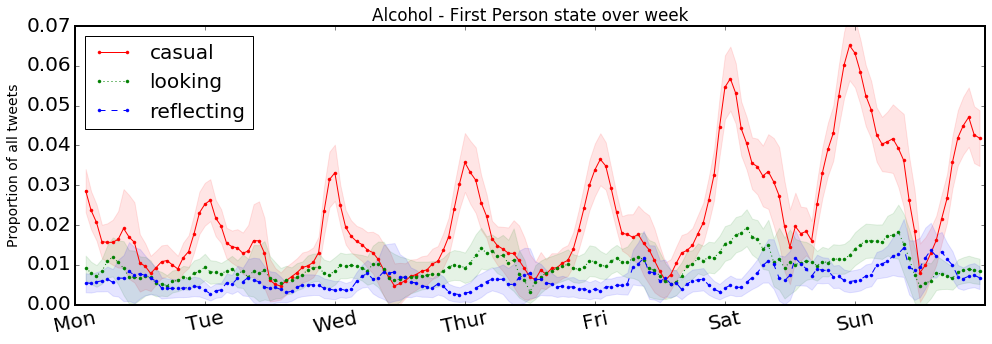

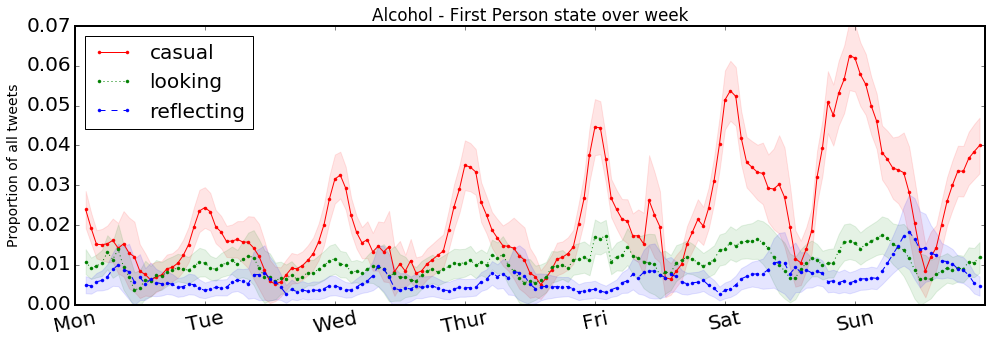

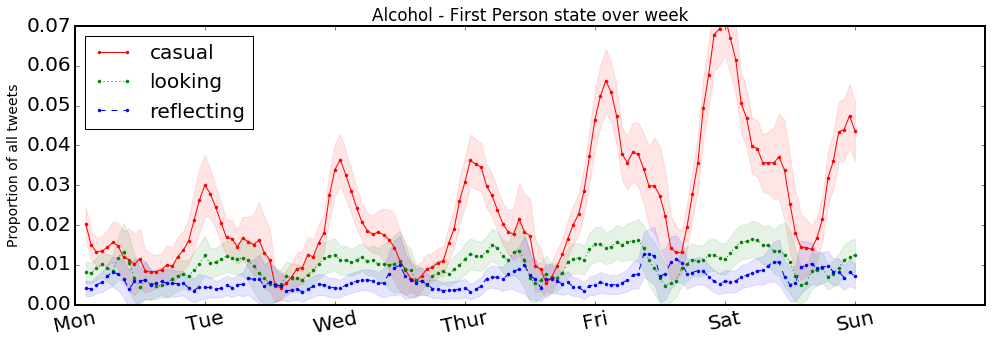

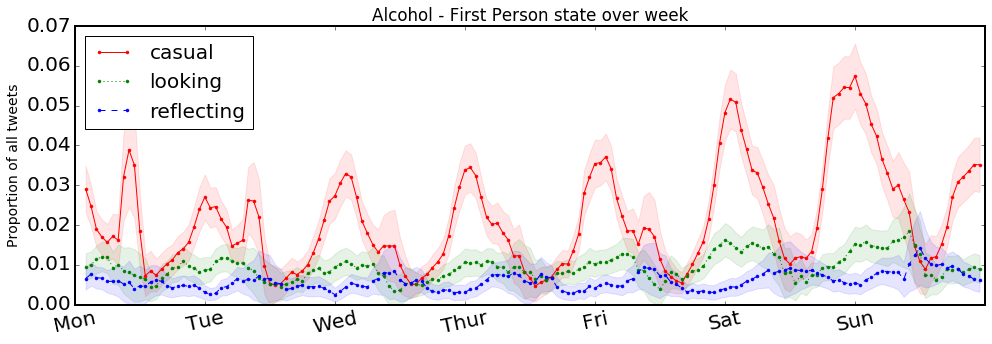

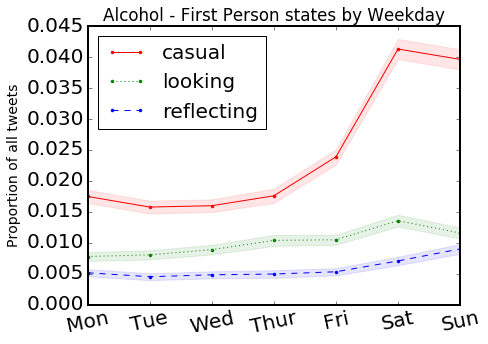

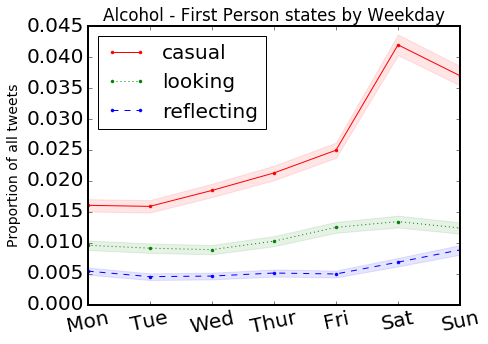

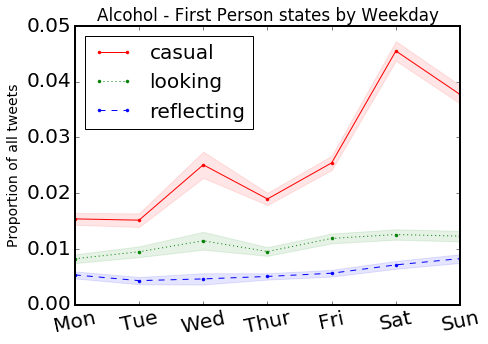

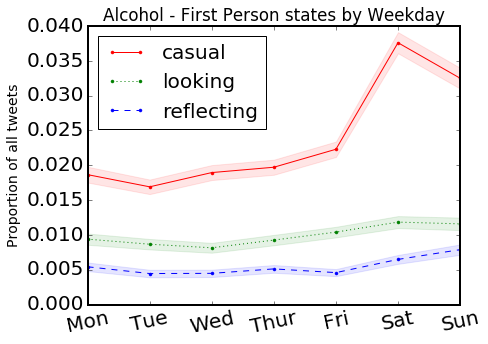

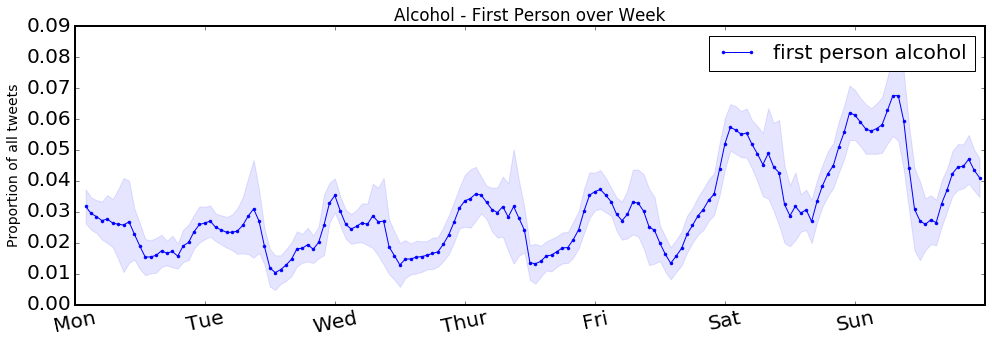

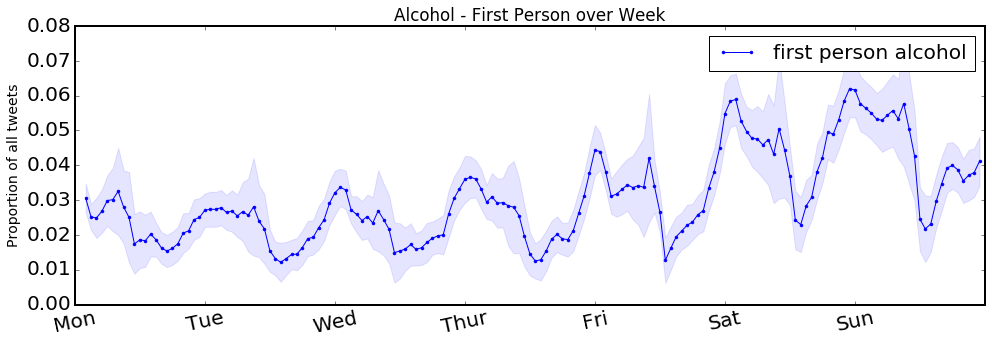

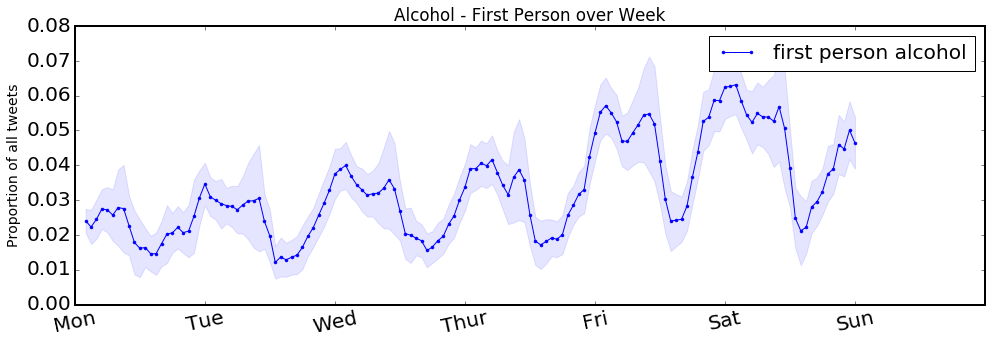

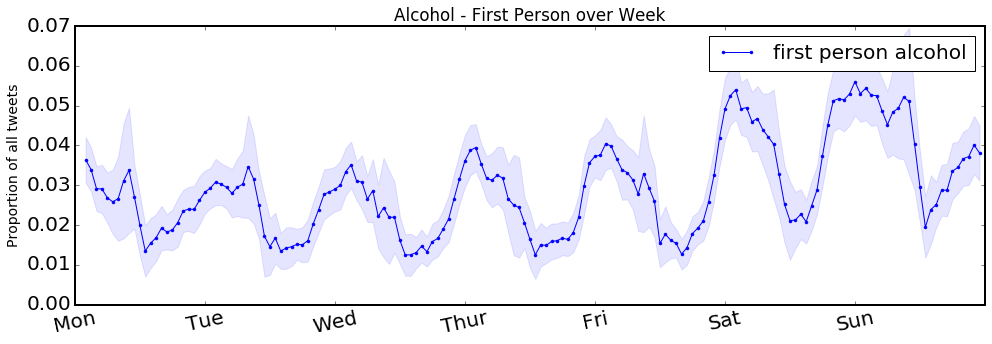

In [89]:
plot_all(weeks, folder='new_plots/june_weekly/')

        False               True           
         mean       err      mean       err
0 0  0.005308  0.002446  0.005308  0.002446
  1  0.005916  0.002465  0.005916  0.002465
  2  0.005204  0.002275  0.005204  0.002275
  3  0.004847  0.002174  0.004847  0.002174
  4  0.007111  0.002835  0.007111  0.002835
        False               True           
         mean       err      mean       err
0 0  0.005288  0.002372  0.005288  0.002372
  1  0.004799  0.002153  0.004799  0.002153
  2  0.004878  0.001908  0.004878  0.001908
  3  0.004327  0.001727  0.004327  0.001727
  4  0.007946  0.002986  0.007946  0.002986
        False               True           
         mean       err      mean       err
0 0  0.004690  0.002451  0.004690  0.002451
  1  0.007394  0.002888  0.007394  0.002888
  2  0.007508  0.002932  0.007508  0.002932
  3  0.008058  0.002921  0.008058  0.002921
  4  0.004702  0.002299  0.004702  0.002299

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


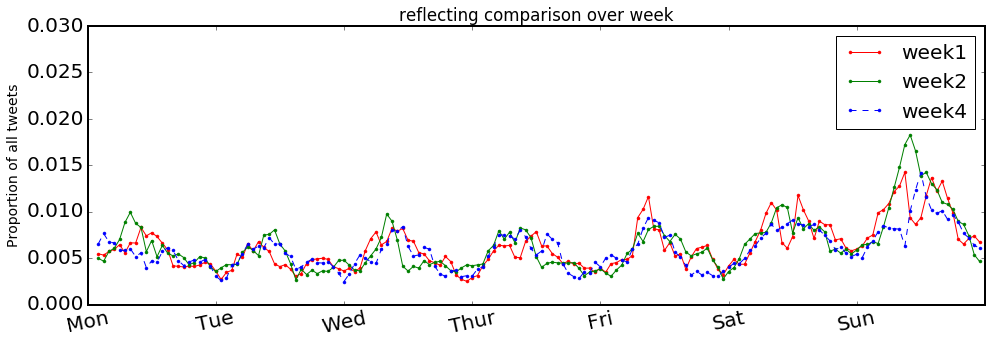

In [69]:
folder = 'new_plots/june_weekly/'
dfs = [week1.reflecting, week2.reflecting, week4.reflecting]
temp = pd.DataFrame()
for df in dfs:
    _temp = df.groupby([df.index.dayofweek, df.index.hour]).agg(
        {
            _:{"mean":"mean", "err":centered_95int} for _ in df
        }
    
    )
    print(_temp.head())
    temp = pd.concat([temp, _temp], axis=1)
    
    
stds = pd.rolling_mean(temp[[1,5,9]], 3)
means = pd.rolling_mean(temp[[0,4,8]], 3)

means.columns = [col[0] for col in means.columns.values]
stds.columns = [col[0] for col in stds.columns.values]

means.columns = ['week1', 'week2', 'week4']
stds.columns = ['week1', 'week2', 'week4']

# print(means)


fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(range(len(means)), means['week1'], "r.-", label="week1")
# ax.fill_between(
#     x=range(len(means)),
#     y1=means['week1'] - stds['week1'],
#     y2=means['week1'] + stds['week1'],
#     color='r', alpha=.1
# )


ax.plot(range(len(means)), means['week2'], "g.-", label="week2")
# ax.fill_between(
#     x=range(len(means)),
#     y1=means['week2'] - stds['week2'],
#     y2=means['week2'] + stds['week2'],
#     color="g", alpha=.1
# )



ax.plot(range(len(means)), means['week4'], "b.--", label="week4")
# ax.fill_between(
#     x=range(len(means)),
#     y1=means['week4'] - stds['week4'],
#     y2=means['week4'] + stds['week4'],
#     color="b", alpha=.1
# )


ax.set_xlim([0, 24*7])
ax.set_ylim([0, .03])
ax.set_xticks(range(0, 24*7, 24))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
ax.set_title("reflecting comparison over week")
ax.set_ylabel("Proportion of all tweets")
ax.legend(loc="best")
plt.savefig(folder + "reflecting_comparison.png")



In [ ]:
def setup_compare(df):
    p = 0.75
    of_interest = df.predict_fpa > p

    df["first_person_alcohol"] = 0
    df["first_person_alcohol"][of_interest] = 1
    fp_cols = [ 'predict_present', 'predict_future', 'predict_past']
    new_fp_cols = ["casual", "looking", "reflecting"]
    for new_name, old_name in zip(new_fp_cols, fp_cols):
        df[new_name] = df[old_name] >0.6

In [17]:
setup(df_all)

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
compare_fps_week([week1.casual, week2.casual, week4.casual])

AttributeError: 'list' object has no attribute 'groupby'